In [29]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
supply_chain_df = pd.read_csv("../data/raw/supply_chain_data.csv")

In [23]:
# Prelimanry inspection
print(supply_chain_df.info())
print(supply_chain_df.describe())
print(supply_chain_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [25]:
# Check for missing values
supply_chain_df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [27]:
# Check number of unique values
supply_chain_df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

# Exploratory Data Analysis

## --- Question 1: Which product types or suppliers have the highest manufacturing or shipping costs? ---


Average Manufacturing Costs by Product Type:
Product type
cosmetics    43.05
haircare     48.46
skincare     48.99
Name: Manufacturing costs, dtype: float64


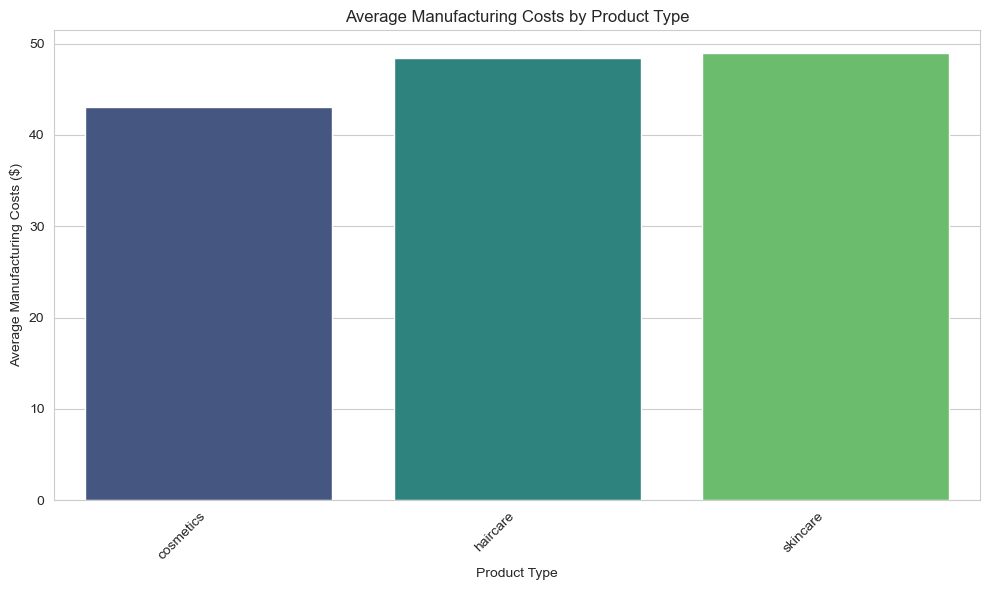

In [45]:
# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Set a default figure size

# Average Manufacturing Costs by Product Type
avg_manuf_cost_by_product = supply_chain_df.groupby('Product type')['Manufacturing costs'].mean()
print("\nAverage Manufacturing Costs by Product Type:")
print(round(avg_manuf_cost_by_product,2))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_manuf_cost_by_product.index, y=avg_manuf_cost_by_product.values, palette='viridis')
plt.title('Average Manufacturing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Manufacturing Costs ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Shipping Costs by Product Type:
Product type
cosmetics    6.06
haircare     5.91
skincare     4.91
Name: Shipping costs, dtype: float64


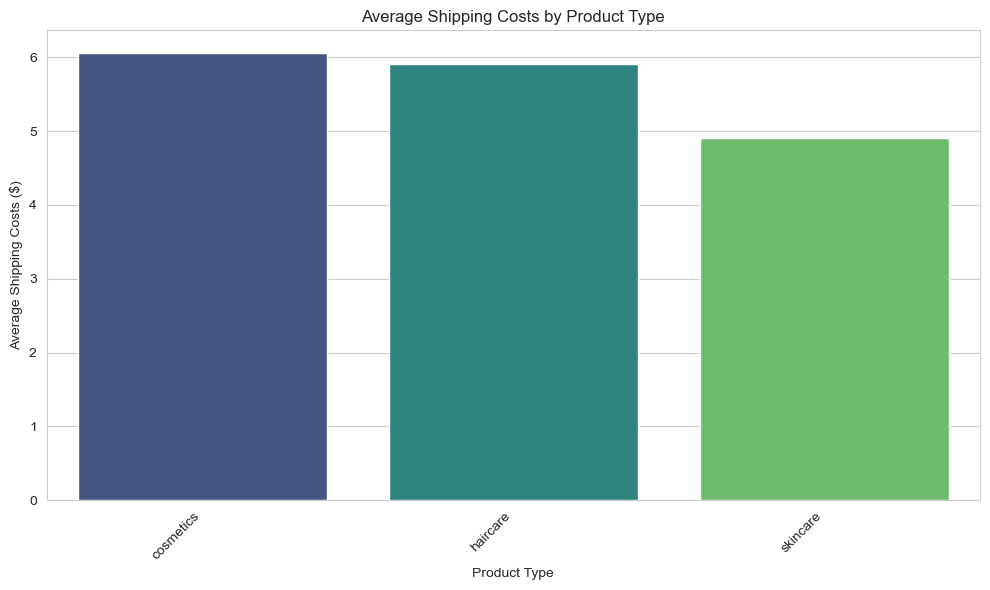

In [47]:
# Average Shipping Costs by Product Type
avg_shipping_cost_by_product = supply_chain_df.groupby('Product type')['Shipping costs'].mean()
print("\nAverage Shipping Costs by Product Type:")
print(round(avg_shipping_cost_by_product,2))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shipping_cost_by_product.index, y=avg_shipping_cost_by_product.values, palette='viridis')
plt.title('Average Shipping Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Shipping Costs ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Manufacturing Costs by Supplier:
Supplier name
Supplier 1    45.25
Supplier 2    41.62
Supplier 3    43.63
Supplier 4    62.71
Supplier 5    44.77
Name: Manufacturing costs, dtype: float64


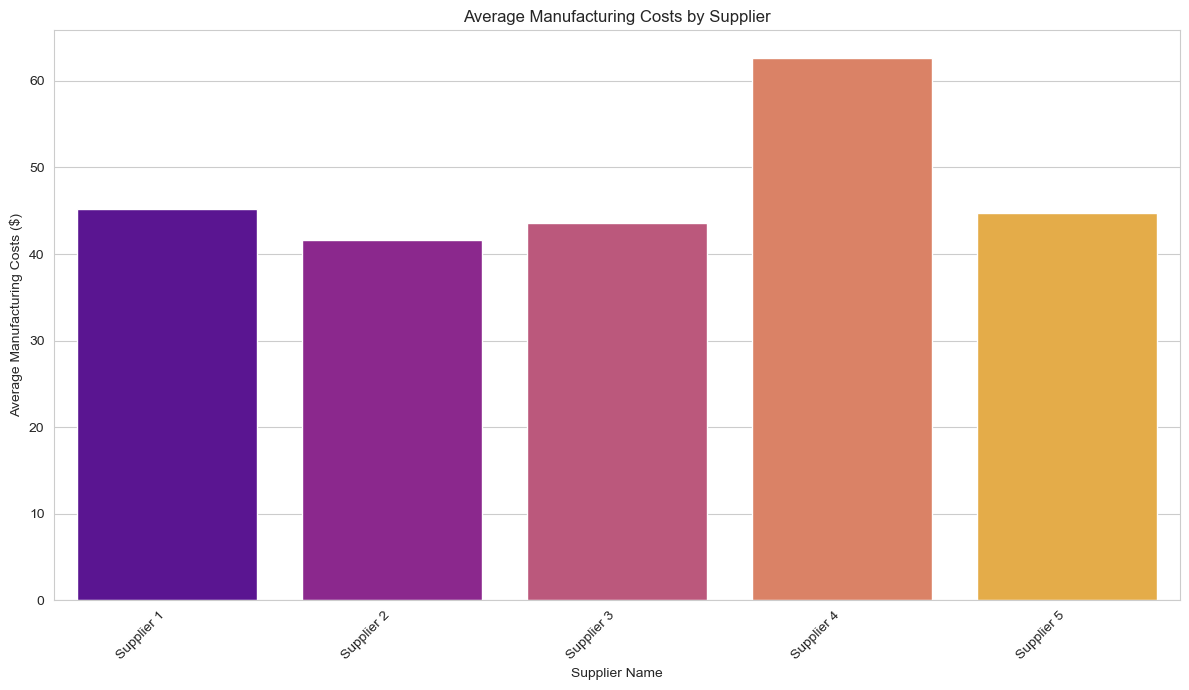

In [65]:
# Average Manufacturing Costs by Supplier
avg_manuf_cost_by_supplier = supply_chain_df.groupby('Supplier name')['Manufacturing costs'].mean()
print("\nAverage Manufacturing Costs by Supplier:")
print(round(avg_manuf_cost_by_supplier,2))

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_manuf_cost_by_supplier.index, y=avg_manuf_cost_by_supplier.values, palette='plasma')
plt.title('Average Manufacturing Costs by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Average Manufacturing Costs ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Shipping Costs by Supplier:
Supplier name
Supplier 1    5.51
Supplier 2    5.74
Supplier 3    4.79
Supplier 4    5.76
Supplier 5    5.79
Name: Shipping costs, dtype: float64


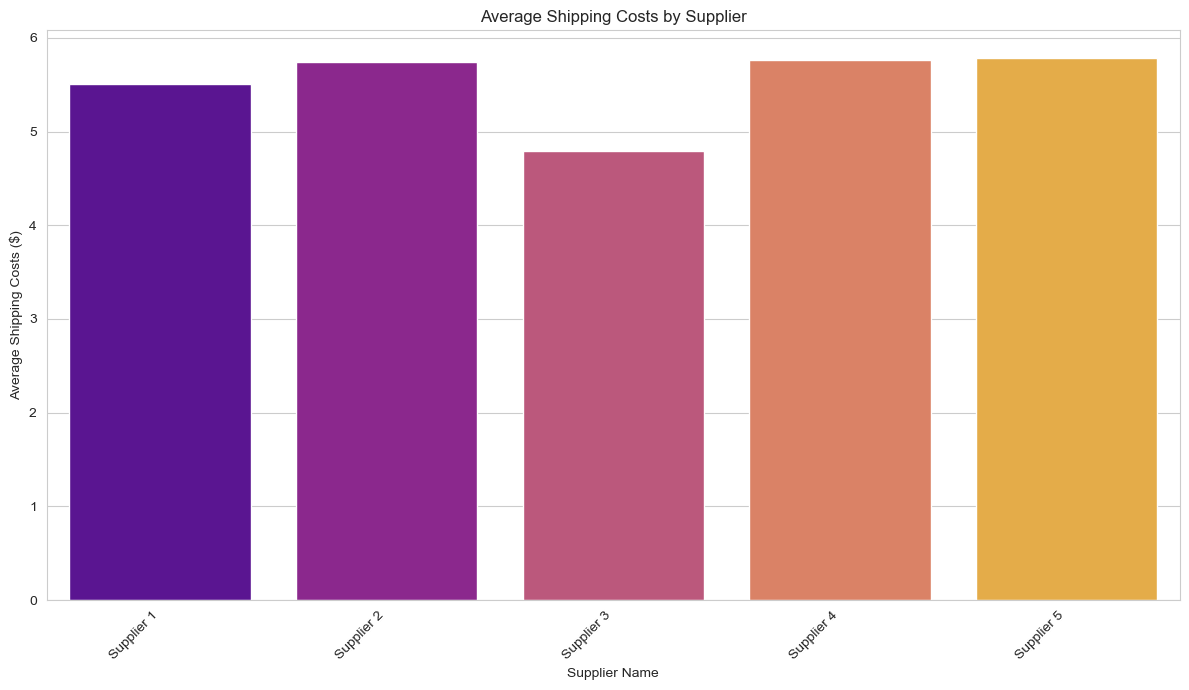

In [67]:
# Average Shipping Costs by Supplier
avg_shipping_cost_by_supplier = supply_chain_df.groupby('Supplier name')['Shipping costs'].mean()
print("\nAverage Shipping Costs by Supplier:")
print(round(avg_shipping_cost_by_supplier,2))

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_shipping_cost_by_supplier.index, y=avg_shipping_cost_by_supplier.values, palette='plasma')
plt.title('Average Shipping Costs by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Average Shipping Costs ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## --- Question 2 & 3: Bottlenecks and Average Lead Times ---
### Are there bottlenecks in the supply chain (e.g., long lead times for certain products)?
### What are the average lead times (overall, manufacturing, shipping) and how do they vary by product type, supplier, or location?



Overall Average Lead Time: 15.96 days

Average Overall Lead Times by Product Type:
Product type
cosmetics    15.38
haircare     15.53
skincare     16.70
Name: Lead times, dtype: float64


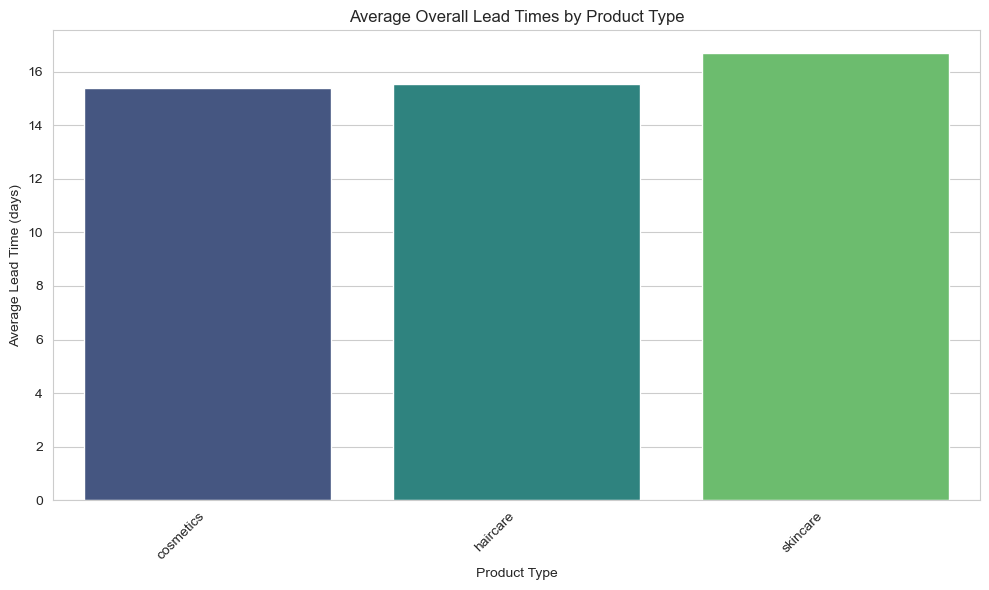

In [80]:
# Overall Average Lead Time
overall_avg_lead_time = supply_chain_df['Lead times'].mean()
print(f"\nOverall Average Lead Time: {overall_avg_lead_time:.2f} days")

# Average Lead Times by Product Type
avg_lead_time_by_product = supply_chain_df.groupby('Product type')['Lead times'].mean()
print("\nAverage Overall Lead Times by Product Type:")
print(round(avg_lead_time_by_product,2))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_lead_time_by_product.index, y=avg_lead_time_by_product.values, palette='viridis')
plt.title('Average Overall Lead Times by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Manufacturing Lead Times by Product Type:
Product type
cosmetics    13.31
haircare     17.06
skincare     13.78
Name: Manufacturing lead time, dtype: float64


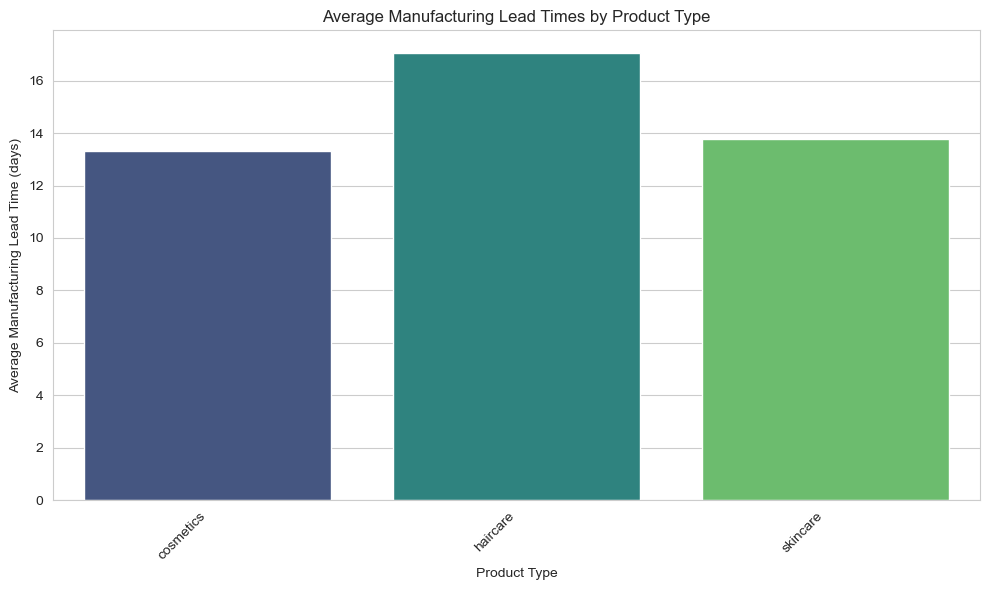

In [84]:
# Average Manufacturing Lead Times by Product Type
avg_manuf_lead_time_by_product = supply_chain_df.groupby('Product type')['Manufacturing lead time'].mean()
print("\nAverage Manufacturing Lead Times by Product Type:")
print(round(avg_manuf_lead_time_by_product,2))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_manuf_lead_time_by_product.index, y=avg_manuf_lead_time_by_product.values, palette='viridis')
plt.title('Average Manufacturing Lead Times by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Manufacturing Lead Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Shipping Times by Product Type:
Product type
cosmetics    6.58
haircare     5.62
skincare     5.32
Name: Shipping times, dtype: float64


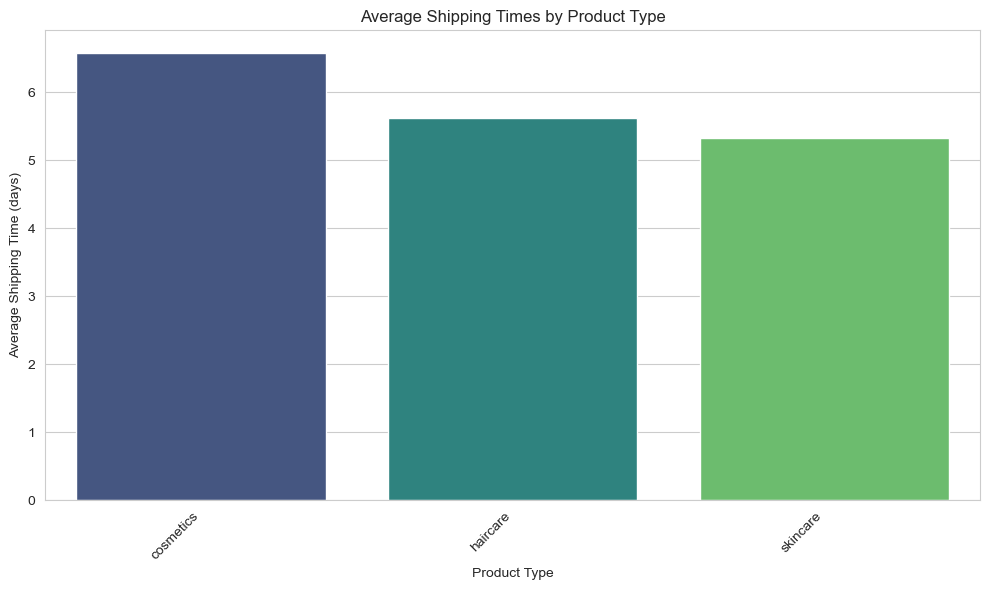

In [92]:
# Average Shipping Times by Product Type
avg_shipping_time_by_product = supply_chain_df.groupby('Product type')['Shipping times'].mean()
print("\nAverage Shipping Times by Product Type:")
print(round(avg_shipping_time_by_product,2))

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shipping_time_by_product.index, y=avg_shipping_time_by_product.values, palette='viridis')
plt.title('Average Shipping Times by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Shipping Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Overall Lead Times by Supplier:
Supplier name
Supplier 1    16.78
Supplier 2    16.23
Supplier 3    14.33
Supplier 4    17.00
Supplier 5    14.72
Name: Lead times, dtype: float64


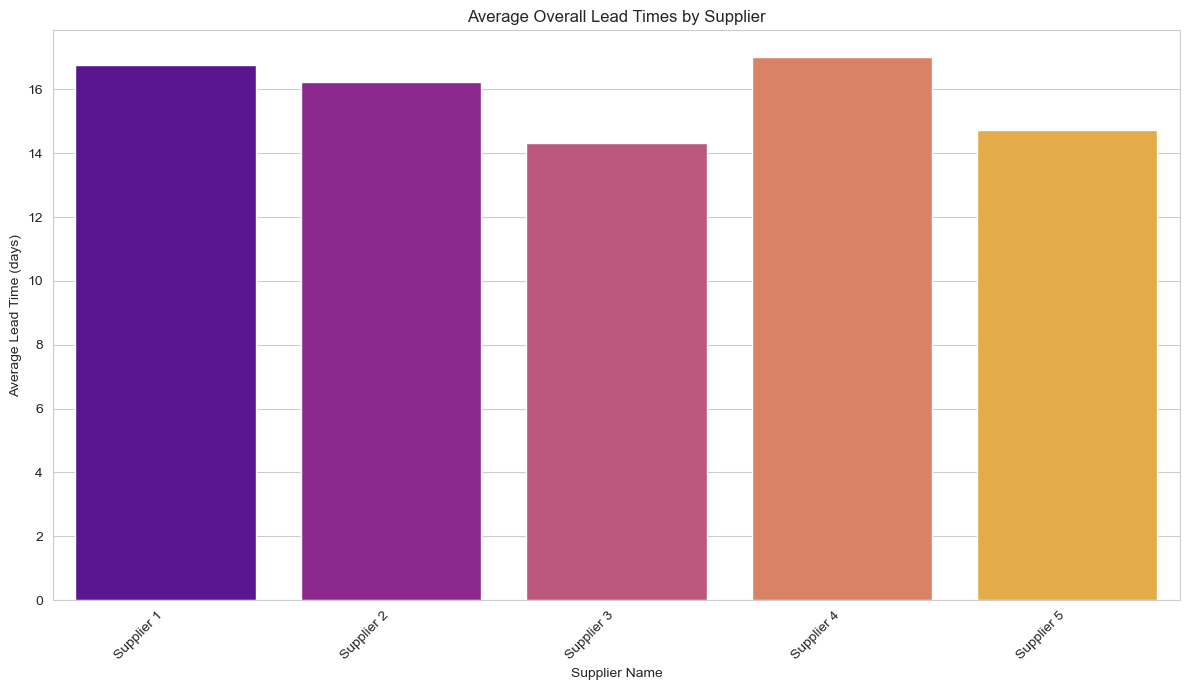

In [94]:
# Average Lead Times by Supplier
avg_lead_time_by_supplier = supply_chain_df.groupby('Supplier name')['Lead times'].mean()
print("\nAverage Overall Lead Times by Supplier:")
print(round(avg_lead_time_by_supplier,2))

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_lead_time_by_supplier.index, y=avg_lead_time_by_supplier.values, palette='plasma')
plt.title('Average Overall Lead Times by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Unique values in 'Location': ['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']

Average Overall Lead Times by Location:
Location
Bangalore    15.33
Chennai      17.15
Delhi        17.67
Kolkata      15.92
Mumbai       14.27
Name: Lead times, dtype: float64


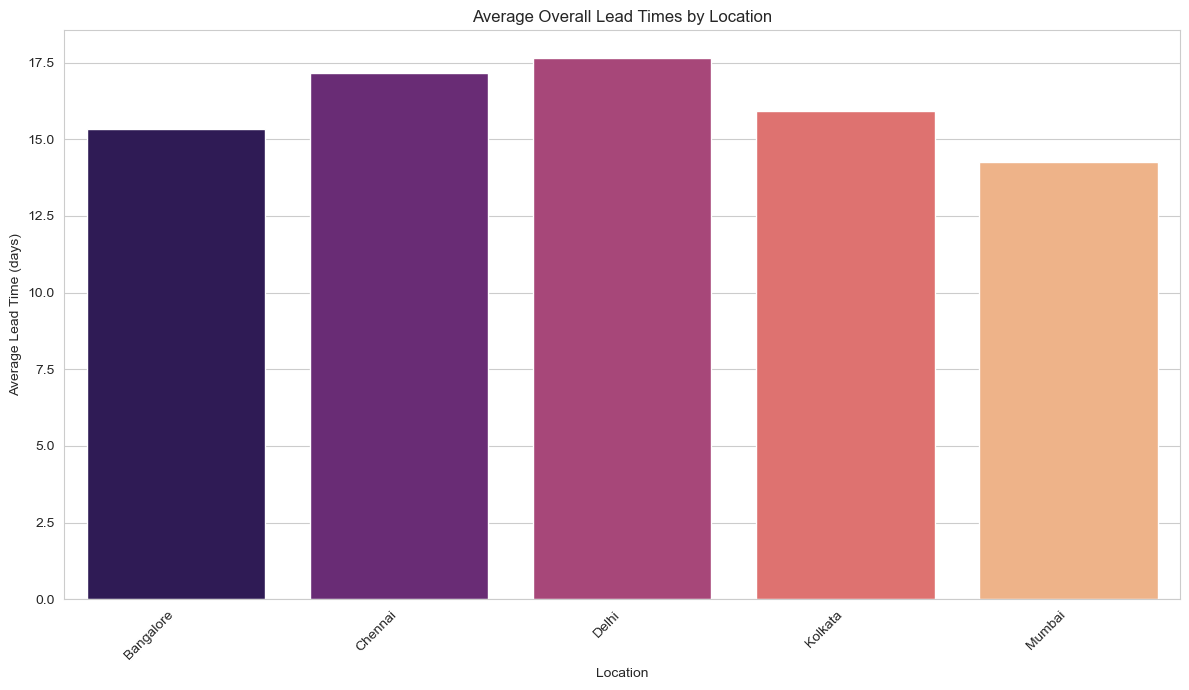

In [100]:
# Average Lead Times by Location 
print(f"\nUnique values in 'Location': {supply_chain_df['Location'].unique()}")
avg_lead_time_by_location = supply_chain_df.groupby('Location')['Lead times'].mean()
print("\nAverage Overall Lead Times by Location:")
print(round(avg_lead_time_by_location,2))

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_lead_time_by_location.index, y=avg_lead_time_by_location.values, palette='magma')
plt.title('Average Overall Lead Times by Location')
plt.xlabel('Location')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## --- Question 4 & 5: Stock Levels, Availability, Sales, and Over/Understocking ---
### What is the relationship between stock levels, availability, and the number of products sold?
### Are there products that are frequently out of stock or overstocked?

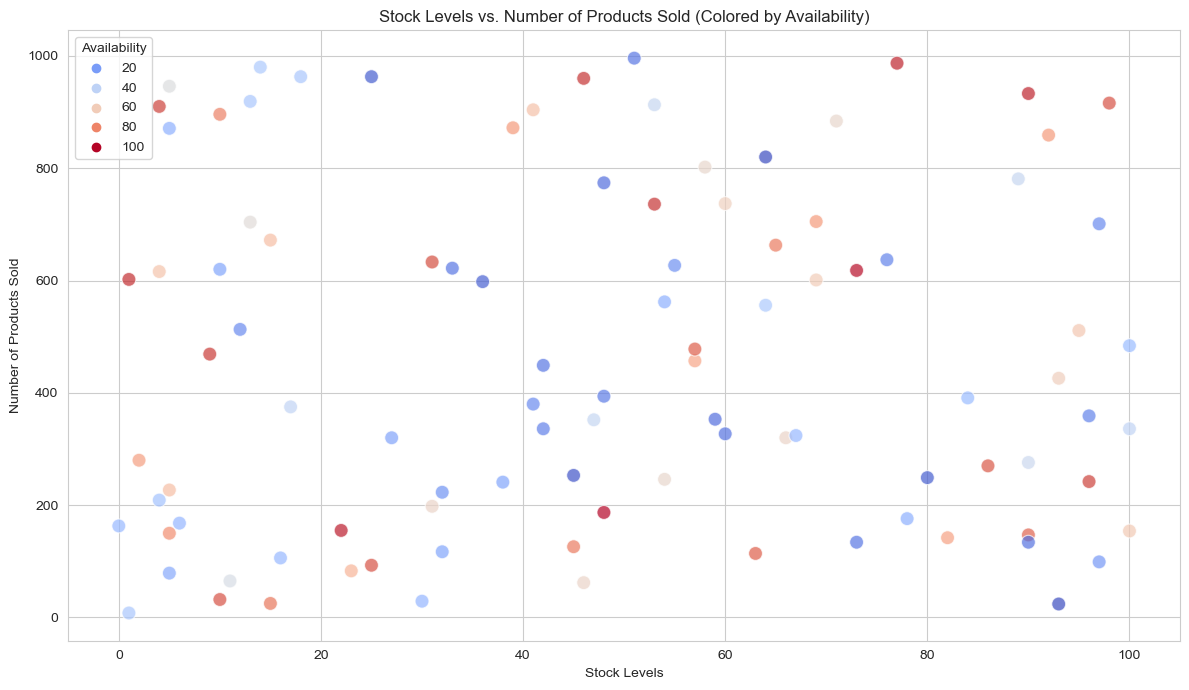

In [103]:
# Relationship between Stock Levels, Availability, and Number of Products Sold

plt.figure(figsize=(12, 7))
sns.scatterplot(data=supply_chain_df, x='Stock levels', y='Number of products sold', hue='Availability', palette='coolwarm', s=100, alpha=0.7)
plt.title('Stock Levels vs. Number of Products Sold (Colored by Availability)')
plt.xlabel('Stock Levels')
plt.ylabel('Number of Products Sold')
plt.legend(title='Availability')
plt.tight_layout()
plt.show()


Correlation Matrix (Stock Levels, Availability, Sales, Revenue):
                         Stock levels  Availability  Number of products sold
Stock levels                 1.000000     -0.025900                 0.022189
Availability                -0.025900      1.000000                 0.087496
Number of products sold      0.022189      0.087496                 1.000000


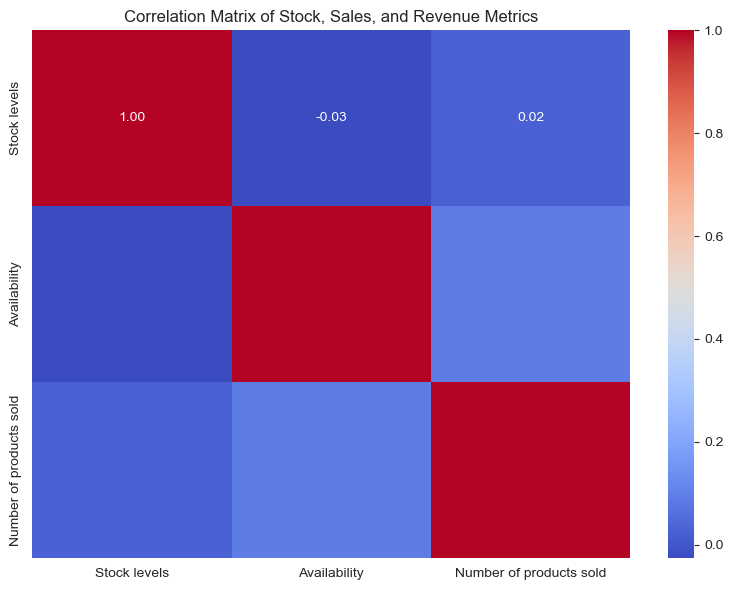

In [107]:
# Correlation matrix for relevant numerical columns
stock_sales_corr_cols = ['Stock levels', 'Availability', 'Number of products sold']
correlation_matrix = supply_chain_df[stock_sales_corr_cols].corr()
print("\nCorrelation Matrix (Stock Levels, Availability, Sales, Revenue):")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock, Sales, and Revenue Metrics')
plt.tight_layout()
plt.show()

In [117]:
# Identifying potentially overstocked/understocked products
# We can define 'overstocked' as very high stock levels relative to sales,
# and 'understocked' as low stock levels with high sales (or low availability).

# For simplicity, let's define thresholds. In a real scenario, this would involve
# more sophisticated inventory management metrics (e.g., inventory turnover).

# Calculate a simple 'Stock-to-Sales Ratio'
supply_chain_df['Stock_to_Sales_Ratio'] = supply_chain_df['Stock levels'] / supply_chain_df['Number of products sold']
# Handle cases where 'Number of products sold' is 0 to avoid division by zero
supply_chain_df['Stock_to_Sales_Ratio'] = supply_chain_df['Stock_to_Sales_Ratio'].replace([np.inf, -np.inf], np.nan)
supply_chain_df['Stock_to_Sales_Ratio'].fillna(0, inplace=True) # If no sales, ratio is 0 or can be treated as such

# Products with very high stock-to-sales ratio might be overstocked
# Products with low stock-to-sales ratio and low availability might be understocked
# Products with low stock-to-sales ratio and high sales might be fast-moving but not necessarily understocked if replenished quickly.

# Let's identify the top 5 products (SKUs) with the highest Stock-to-Sales_Ratio (potentially overstocked)
# Filter out products with 0 sales if that's not relevant for overstocking analysis
overstocked_products = supply_chain_df[supply_chain_df['Number of products sold'] > 0].sort_values(by='Stock_to_Sales_Ratio', ascending=False).head(5)
print("\nTop 5 Potentially Overstocked Products (High Stock/Sales Ratio):")
print(overstocked_products[['SKU', 'Product type', 'Stock levels', 'Number of products sold', 'Stock_to_Sales_Ratio']])

# Products with low availability and high number of products sold (indicating high demand)
understocked_products_potential = supply_chain_df[
    (supply_chain_df['Availability'] <= availability_threshold) &
    (supply_chain_df['Number of products sold'] > supply_chain_df['Number of products sold'].median()) # Sales above median
].sort_values(by='Number of products sold', ascending=False).head(5)

print("\nTop 5 Potentially Understocked Products (Low Availability & High Sales):")
print(understocked_products_potential[['SKU', 'Product type', 'Stock levels', 'Number of products sold', 'Stock_to_Sales_Ratio']])


Top 5 Potentially Overstocked Products (High Stock/Sales Ratio):
      SKU Product type  Stock levels  Number of products sold  \
45  SKU45     haircare            93                       24   
48  SKU48     haircare            30                       29   
49  SKU49    cosmetics            97                       99   
97  SKU97     haircare            46                       62   
89  SKU89    cosmetics            90                      134   

    Stock_to_Sales_Ratio  
45              3.875000  
48              1.034483  
49              0.979798  
97              0.741935  
89              0.671642  

Top 5 Potentially Understocked Products (Low Availability & High Sales):
      SKU Product type  Stock levels  Number of products sold  \
10  SKU10     skincare            51                      996   
37  SKU37     skincare            25                      963   
52  SKU52     skincare            64                      820   
81  SKU81     haircare            48           

In [120]:
supply_chain_df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs', 'Stock_to_Sales_Ratio'],
      dtype='object')